# Abdulaziz Alanazi 
# MSDS692 


# Fake News Detection Project 

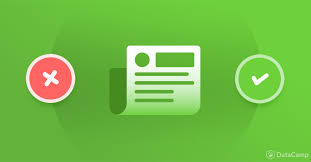
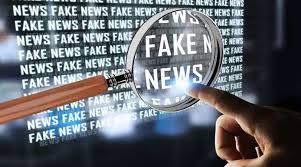



## Inroduction:

Fake news is not a recent problem but is changing. Nowadays, the communication between people has expanded significantly, and because of that, we saw the appearance of novel ways to spread news like social media, news blogs, and online newspapers. These media facilitate the distribution of real-time information, and also everyone can easily write fake news on the internet. There are several concepts that are close to fake news: rumors, satire news, fake reviews, misinformation, fake advertisements, conspiracy theories, false statements by politicians, etc., which affect every aspect of people’s lives. Considering that the dissemination of digital information is exponential, artificial intelligence plays a fundamental role, and more specifically natural language processing (NLP) and machine learning approaches. 

Fake news detection is the task of evaluating the truthfulness of a certain piece of news. There are other similar domains like fake account detection, unknown news creator detection, sentiment analysis and so on, therefore, as being in the data science community I am doing this practicum project to take an action to fight the problem. 


## Datasets: 

**1- Kaggle: Labaled Dataset**
A. Fake news data: This dataset contains a list of articles considered  "fake" news
B. Real news data: This dataset contains a list of articles considered ”real" news
They both will be merged together with a label binary column "Fake" or "Real"  

The data is here "https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset" 
The altered and pre-processed data will be provided in a CSV file . 

**2- Web Scraping:** 
A. An article pulled from CNN Politics. The data can be found here: https://edition.cnn.com/2022/09/16/politics/donald-trump-hugh-hewitt-interview-indicted/index.html
B. Political posts and news from Reddit Platform: will be given in a csv file 


##### Details: 

In this project, we will be working on several datasets the first is labeled data and the other is an article that I pulled from a website.  Then, another data that crawled from Reddit platform was added because the article data did not too much text in it.  
For the part one, because the first data is labeled, we will analyze and prepare it and then use it to train and test the supervised algorithm/s and then will apply the same pretrained algorithm/s to the other dataset in order to detect if it contains fake news, we will see how much fake news in them later in the end of the analysis


## 1.0 Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import nltk
from nltk.corpus import stopwords
import re

from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.preprocessing import StandardScaler

stop_words = STOP_WORDS
import string
punctuations = string.punctuation
from gensim.models import Word2Vec

from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from sklearn.naive_bayes import MultinomialNB

## 2.0 Reading the data

In [2]:
# Reading the Data

real_news=pd.read_csv('/Users/newuser/Desktop/Practucum1/My data/True.csv')
fake_news = pd.read_csv('/Users/newuser/Desktop/Practucum1/My data/Fake.csv')


## 3.0 Basic Information about DataSet

In [3]:
# Getting the shape of real news data
real_news.shape

(21417, 4)

In [4]:
fake_news.shape

(23481, 4)

In [5]:
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
real_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


## 4.0 Exploratory Data Analysis

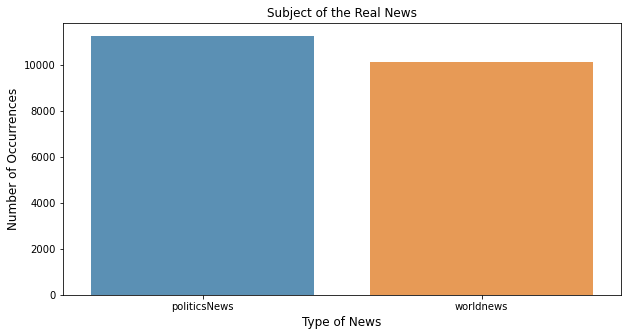

In [9]:
real_subject_count=real_news['subject'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(real_subject_count.index, real_subject_count.values, alpha=0.8)
plt.title('Subject of the Real News')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type of News', fontsize=12)
plt.show()

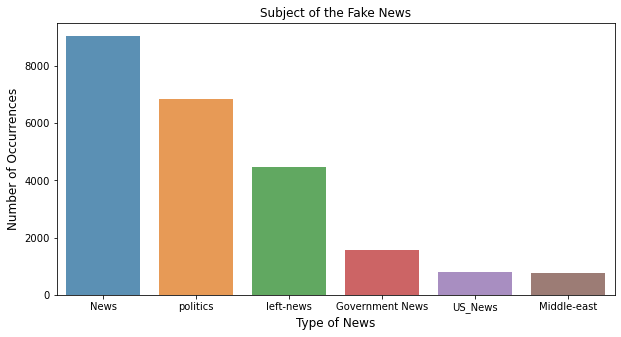

In [10]:
fake_subject_count=fake_news.subject.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(fake_subject_count.index, fake_subject_count.values, alpha=0.8)
plt.title('Subject of the Fake News')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type of News', fontsize=12)
plt.show()

<AxesSubplot:xlabel='count', ylabel='subject'>

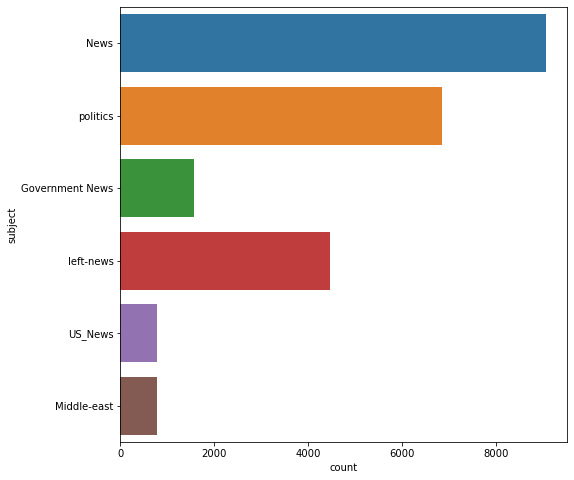

In [11]:
plt.figure(figsize=(8,8))
sns.countplot(y='subject', data = fake_news)

<AxesSubplot:xlabel='count', ylabel='subject'>

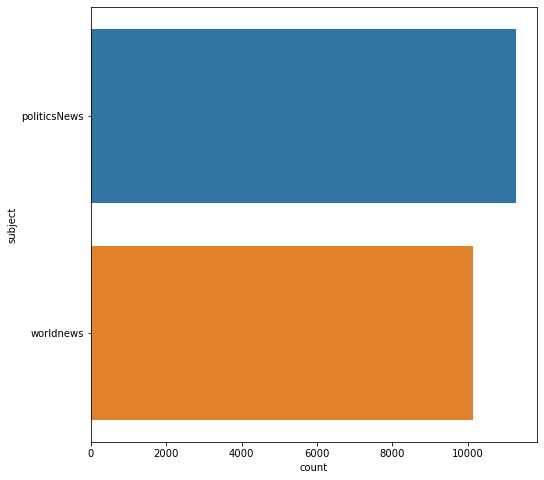

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(y='subject', data = real_news)

'




**Plotting Wordclouds for fake and real texts:**

(-0.5, 399.5, 199.5, -0.5)

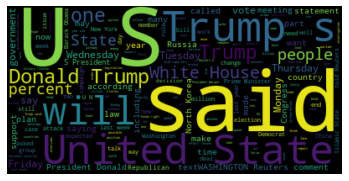

In [13]:
from wordcloud import WordCloud
wc = WordCloud().generate('text'.join(real_news['text']))
2
plt.imshow(wc, interpolation="bilinear")
3
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

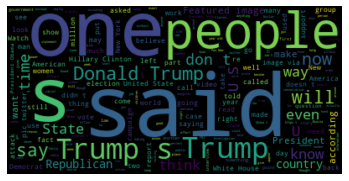

In [14]:
from wordcloud import WordCloud
wc = WordCloud().generate('text'.join(fake_news['text']))
2
plt.imshow(wc, interpolation="bilinear")
3
plt.axis('off')

***Important:*** 

In this project, we are intersted in the politics news, so I took  the "politicsNews" from the subject column and it is 11272 entries, and for the fake news I took only the politics ones, but it has only 6841 entries and this.  This will make the fake news data almost 50% less than the real ones which means the data will be imbalnced and this is not good for our ML algorithim. One of the solutions is to do down or up sampling, but doing down-sampling for example may impact the accuracy.   I see that I have another solution. What I will do is that I will add new data to the fake news so we can equalize or reduce the gap between the big and small samples, at least make the data slightly imablanced.  Therefore, if we take a look at the subject column in the fake news data we have govenrment news and Us_News which they are political kind of news. 

**The plan is get politicis news as much as we can in order to get a more balanced data and feed our model with more real and fake news to fulfill our task (detecting fake news from an article news data)** 

## 5.0 Cleaning & Preparing the Data 

In [15]:
# Getting the data having politics as subject

real_news1=real_news[real_news['subject']=='politicsNews']
fake_news1=fake_news[fake_news['subject'].isin(['politics','Government News', 'US_News'])].reset_index(drop=True)

In [16]:
fake_news1.subject.value_counts(), real_news1.subject.value_counts()

(politics           6841
 Government News    1570
 US_News             783
 Name: subject, dtype: int64,
 politicsNews    11272
 Name: subject, dtype: int64)

In [17]:
# checking if there is empty rows in real news
empty_real_index = [index for index,text in enumerate(real_news1.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(empty_real_index)}")
real_news1.iloc[empty_real_index].tail()

No of empty rows: 1


,title,text,subject,date
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016"


In [18]:
# checking for the same in fake news
empty_fake_index = [index for index,text in enumerate(fake_news1.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(empty_fake_index)}")
fake_news1.iloc[empty_fake_index].tail()

No of empty rows: 480


,title,text,subject,date
8312,(VIDEO)MILWAUKEE SHERIFF DAVID CLARKE HAMMERS ...,,Government News,"May 8, 2015"
8323,BLACK REPUBLICAN AND BRILLIANT NEUROSURGEON AN...,,Government News,"May 5, 2015"
8325,(VIDEO)INCREDIBLE ACCOUNT FROM SHERIFF MICHAEL...,,Government News,"May 4, 2015"
8337,(VIDEO) RIOTERS TAKE SELFIES WITH TORCHED POLI...,,Government News,"Apr 27, 2015"
8368,TREY GOWDY TO DEA CHIEF ON MISCONDUCT: “WHAT T...,,Government News,"Apr 14, 2015"


In [19]:
# since it is only one row we can remove it
# dropping this row in real set
real_news1 = real_news1.drop(8970, axis=0)

In [20]:
empty_real_index = [index for index,text in enumerate(real_news1.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(empty_real_index)}")
real_news1.iloc[empty_real_index].tail()

No of empty rows: 0


,title,text,subject,date


##### If it were a numeric data, we would use frequent/mean/median or other methods of imputation, but since we are dealing with text data this means there are empty strings (0 sentences, 0 words) and this could be a valid text value. When we convert the text to numric their values will be zero. 

In [21]:
 # Get the substring in pandas 
# getting a the source from each text 
real_news1['source'] =real_news1.text.str.slice(10, 20)
print(real_news1)

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
11267  Obama says willing to work with Republican Spe...   
11268  Obama says Islamic State fight far from 'World...   
11269  Chelsea Clinton stands her mother's ground in ...   
11270  Obama jokes about a Trump State of the Union a...   
11271  Clinton expands on plan to tax wealthy as Sand...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv... 

###### Looking at the data:, difference in Text

In [22]:
real_news1.source.value_counts()

 (Reuters)    5939
Reuters) -     768
euters) -      388
(Reuters)      206
uters) - T     129
              ... 
exico (Reu       1
WIS, Scotl       1
- Cerberus       1
/CALGARY,        1
N DIEGO (R       1
Name: source, Length: 1217, dtype: int64




##### Well, 
real news seems to have source of publication which is not present in fake news set
most of text contains reuters information such as **"WASHINGTON (Reuters)"**.
Some text are tweets from Twitter
Few text do not contain any publication info 

**"Reuters is one of the biggest news agencies in the world, employing over 2,500 journalists. Today, it stands out as a wire service often trusted by publications on the right and left. Given this central position, it’s worth asking two questions: How reliable is Reuters and how biased is its coverage?"**

**" Reuters scored an average Factual Grade of 69.8%"** to see how does the factual grade work right here:  https://www.thefactual.com/how-it-works/

Also, according to this website https://www.allsides.com, the source has a center bias rate as seen in the chart below:

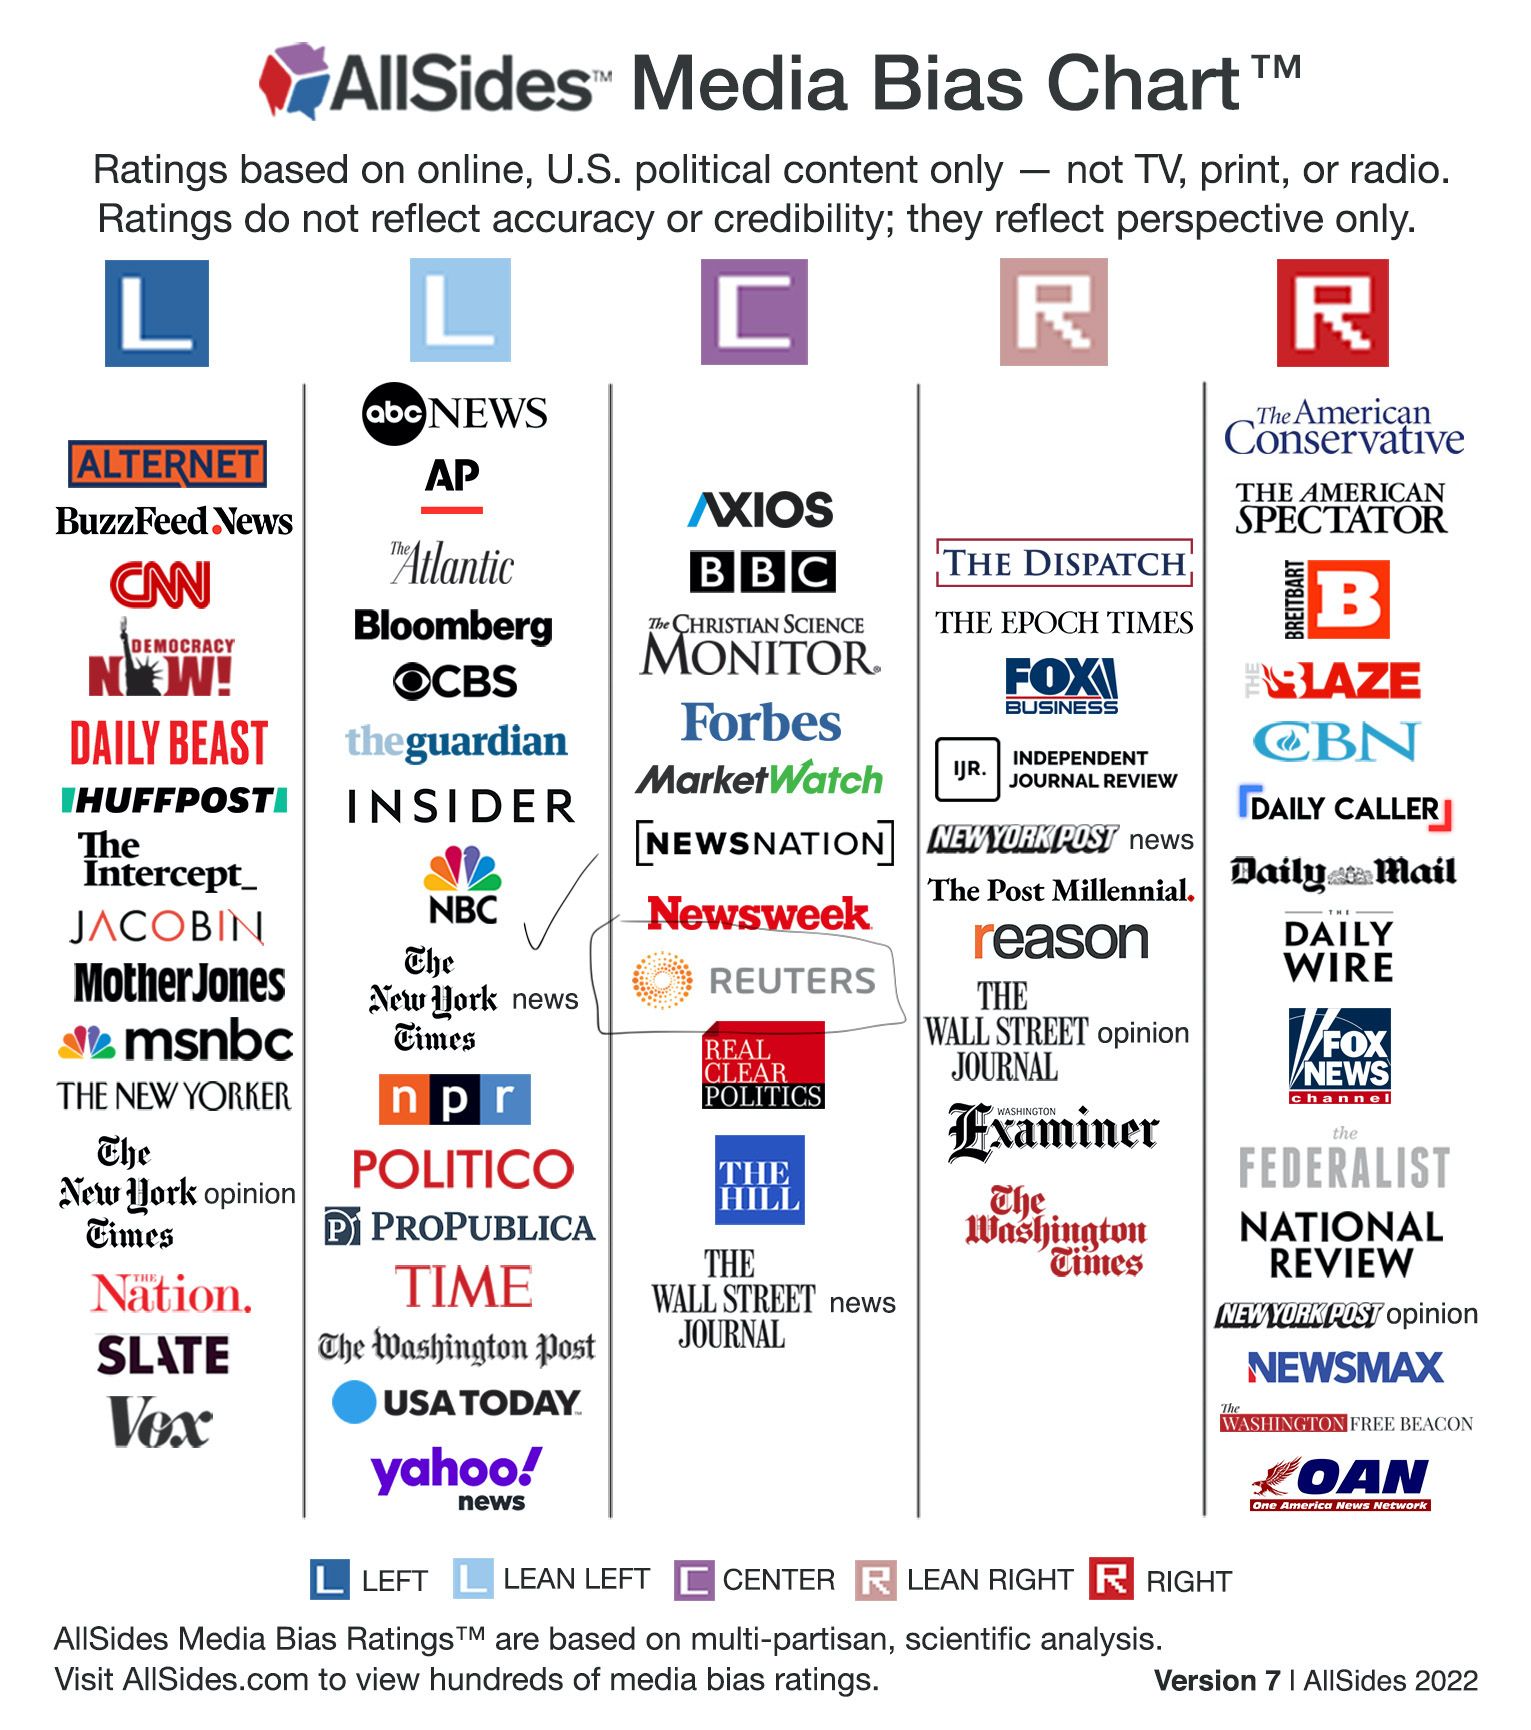

### Merging the two datasets:

In [23]:
real_news1.subject.value_counts()

politicsNews    11271
Name: subject, dtype: int64

In [24]:
#creating label for fake and real news
real_news1['label']=1
fake_news1['label']=0

In [25]:
real_news1.head()

,title,text,subject,date,source,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",(Reuters),1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",(Reuters),1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",(Reuters),1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",(Reuters),1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",SHINGTON (,1


In [26]:
fake_news1.head()

,title,text,subject,date,label
0,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",politics,19-Feb-18,0
1,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,politics,19-Feb-18,0
2,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,politics,19-Feb-18,0
3,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politics,18-Feb-18,0
4,DOJ’s JEFF SESSIONS Opens Investigation Into W...,Thank goodnesss Jeff Sessions is moving on fin...,politics,18-Feb-18,0


In [27]:
fake_news1['title'][1]

'MSNBC ANCHOR Flabbergasted at What Texas Teachers Do to Protect Their Students [Video]'

In [28]:
fake_news1['text'][1]

'If we protect every other government building or public venue with armed guards, why shouldn t our schools be protected with armed teachers? A Texas Sheriff shocked an MSNBC host when he discussed how he prepares local teachers to be armed in the classroom. common sense solution? You betcha!Sheriff Paul Cairney of Argyle, Texas, described the process by which staff members can carry firearms in the school district. The Sheriff said that the staff at the school who choose to carry a firearm go through an intense round of interviews and training before they are allowed to carry on campus. The MSNBC host was flabbergasted at the practice and asked the Sheriff about concerns for the safety of the students in the school when there are firearms around.Sheriff Cairney:  The time to do nothing is over THE PROCESS TO BECOME A SCHOOL MARSHALL:To become a school marshal, those employees must undergo extensive active shooter and firearms training with the state. They must also undergo a mental he

In [29]:
#Appending the two dataframe
news_df = real_news1.append(fake_news1, ignore_index=True)

In [30]:
news_df.shape

(20465, 6)

In [31]:
news_df.head()

,title,text,subject,date,source,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",(Reuters),1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",(Reuters),1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",(Reuters),1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",(Reuters),1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",SHINGTON (,1


#### Some visulaization: 

subject
Government News     1570
US_News              783
politics            6841
politicsNews       11271
Name: text, dtype: int64


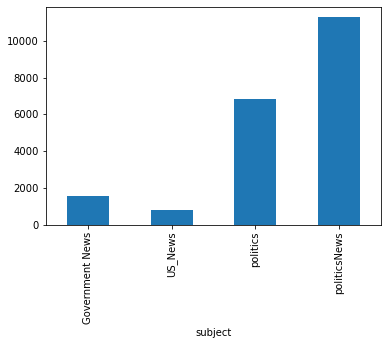

In [32]:
# To show how many articles per subject:
print(news_df.groupby(['subject'])['text'].count())
news_df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

label
0     9194
1    11271
Name: text, dtype: int64


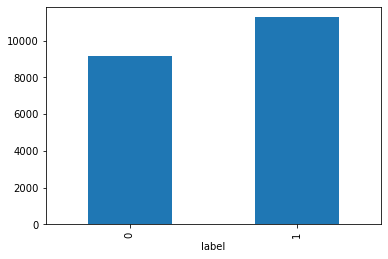

In [33]:
print(news_df.groupby(['label'])['text'].count())
news_df.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

1    11271
0     9194
Name: label, dtype: int64


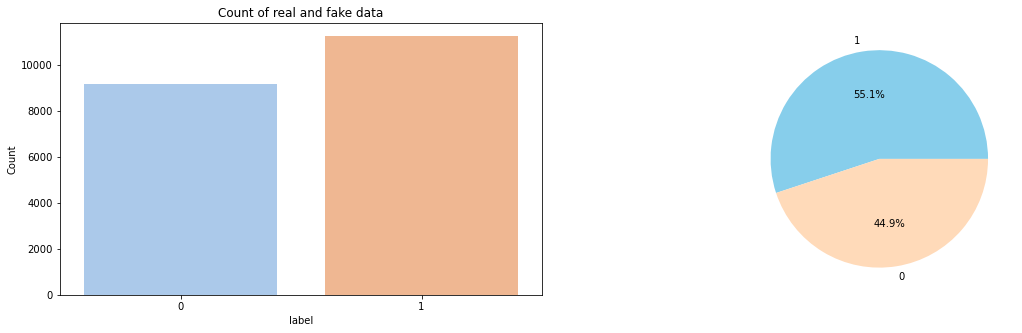

In [34]:
print(news_df["label"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(news_df.label,ax=ax[0],palette="pastel");
g1.set_title("Count of real and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("label")
g2 = plt.pie(news_df["label"].value_counts().values,explode=[0,0],labels=news_df.label.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
fig.show()

politicsNews       11271
politics            6841
Government News     1570
US_News              783
Name: subject, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

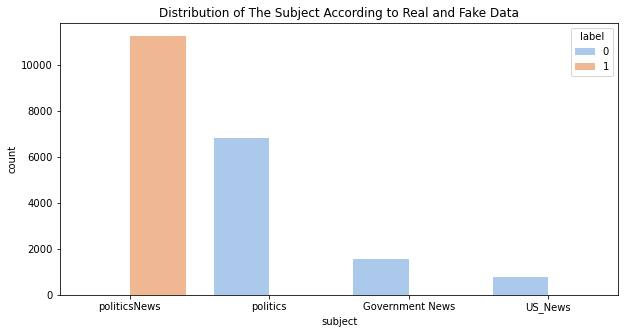

In [35]:
print(news_df.subject.value_counts())
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="subject",  hue='label', data=news_df, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

In [36]:
import nltk
# let's see the 10 most words used in text:
freq = nltk.FreqDist(' '.join(news_df['text']).split())

freq.most_common(10)

[('the', 416034),
 ('to', 242728),
 ('of', 197256),
 ('a', 177580),
 ('and', 176935),
 ('in', 146464),
 ('that', 95061),
 ('on', 87739),
 ('for', 78649),
 ('is', 64871)]

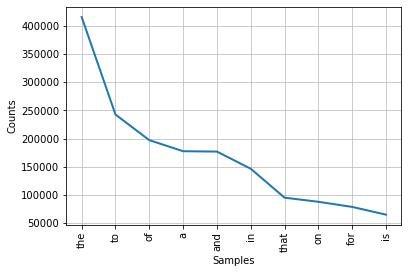

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [37]:
 # These are the 10 most words used, I will plot them too:
freq.plot(10)

In [38]:
import nltk
# let's see the 10 most words used in title:
freq1 = nltk.FreqDist(' '.join(news_df['title']).split())

freq1.most_common(10)

[('Trump', 5233),
 ('to', 4953),
 ('U.S.', 3111),
 ('To', 2594),
 ('on', 2215),
 ('in', 2091),
 ('[Video]', 2065),
 ('of', 1962),
 ('for', 1715),
 ('says', 1457)]

In [39]:
from nltk import FreqDist
# 10 least used words:
last_ten = FreqDist(dict(freq.most_common()[-10:]))
last_ten

FreqDist({'Die,': 1, 'die!': 1, '(regardless,': 1, 'scary).': 1, 'DUAL': 1, 'LOYALTIES:': 1, 'Mondoweiss,': 1, 'IDF.': 1, 'towards,': 1, 'overdrive.READ': 1})

In [40]:
from nltk import FreqDist
# 10 least used words:
last_ten1 = FreqDist(dict(freq1.most_common()[-10:]))
last_ten1

FreqDist({'Narrative’': 1, 'Burns,': 1, 'Retreat,': 1, '#38': 1, 'Showdown': 1, 'Looms': 1, 'Ranching': 1, 'Bundys': 1, 'Troubled': 1, 'King:': 1})

### Data Prepration For ML:

In [41]:
news_df.head()

,title,text,subject,date,source,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",(Reuters),1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",(Reuters),1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",(Reuters),1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",(Reuters),1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",SHINGTON (,1


In [42]:
# Removing the un-important columns

news_df=news_df[['title','text','label']]

In [43]:
news_df.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [44]:
# in order to remove bias I will shuffle the data
from sklearn.utils import shuffle
news_df = shuffle(news_df)
news_df = news_df.reset_index(drop=True)
news_df

,title,text,label
0,"Trump tower in Canada close to sale, future of...",TORONTO (Reuters) - Toronto’s Trump tower is c...,1
1,Trump vows to back U.S. dairy farmers in Canad...,(Reuters) - U.S. President Donald Trump promis...,1
2,13 YR OLD BLACK CONSERVATIVE Hammers #BlackLiv...,The spoiled brats protesting on colleges campu...,0
3,"Biden, Netanyahu discuss Iran, Islamic State, ...",WASHINGTON (Reuters) - U.S. Vice President Joe...,1
4,"Battling to hold off Sanders, Democrat Clinton...",WASHINGTON (Reuters) - Democratic presidential...,1
...,...,...,...
20460,Trump administration reviewing Cuba policy: Wh...,WASHINGTON (Reuters) - The Trump administratio...,1
20461,Story Withdrawn: Wealthy win in U.S. House tax...,WASHINGTON (Reuters) - Please note that the st...,1
20462,MSNBC PROPAGANDIST: The Word ‘Trump’ is ‘Moder...,Isn t it unbelievable that these so-called exp...,0
20463,PARENTS JAILED AND KIDS TAKEN AWAY FOR 90 MINU...,This is so over the top it s not funny. I m a ...,0


Shuffling the data serves the purpose of reducing variance and making sure that models remain general and overfit less and make the train/test sets representative of the overall distribution of the data.

In [45]:
# Convert the text to lowercase:

news_df['text'] = news_df['text'].apply(lambda x: x.lower())
news_df['title'] = news_df['title'].apply(lambda x: x.lower())
# Remove punctuation:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
news_df['text'] = news_df['text'].apply(punctuation_removal)

In [46]:
def punctuation_removal(title):
    all_list = [char for char in title if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
news_df['title'] = news_df['title'].apply(punctuation_removal)

In [47]:
news_df

,title,text,label
0,trump tower in canada close to sale future of ...,toronto reuters toronto’s trump tower is clos...,1
1,trump vows to back us dairy farmers in canada ...,reuters us president donald trump promised on...,1
2,13 yr old black conservative hammers blacklive...,the spoiled brats protesting on colleges campu...,0
3,biden netanyahu discuss iran islamic state syr...,washington reuters us vice president joe bide...,1
4,battling to hold off sanders democrat clinton ...,washington reuters democratic presidential fr...,1
...,...,...,...
20460,trump administration reviewing cuba policy whi...,washington reuters the trump administration i...,1
20461,story withdrawn wealthy win in us house tax bi...,washington reuters please note that the story...,1
20462,msnbc propagandist the word ‘trump’ is ‘modern...,isn t it unbelievable that these socalled expe...,0
20463,parents jailed and kids taken away for 90 minu...,this is so over the top it s not funny i m a h...,0


In [48]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#establish the lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
news_df['text'] = news_df.text.apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))
news_df.head(10)

[nltk_data] Downloading package wordnet to /Users/newuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,text,label
0,trump tower in canada close to sale future of ...,toronto reuters toronto’s trump tower is close...,1
1,trump vows to back us dairy farmers in canada ...,reuters u president donald trump promised on t...,1
2,13 yr old black conservative hammers blacklive...,the spoiled brat protesting on college campus ...,0
3,biden netanyahu discuss iran islamic state syr...,washington reuters u vice president joe biden ...,1
4,battling to hold off sanders democrat clinton ...,washington reuters democratic presidential fro...,1
5,us senate democrat leader demands reversal of ...,reuters u senate democratic leader chuck schum...,1
6,pentagon request denied video armed citizens d...,ordinary citizen many of them are proud vetera...,0
7,watch meghan mccain rips into joy behar for he...,the view cohost and rabid liberal activist joy...,0
8,nancy pelosi off her meds again the republican...,nancy pelosi decided to make a connection betw...,0
9,environmental groups sue trump administration ...,washington reuters several environmental group...,1


**code source for the above fumctions**
https://www.guru99.com/stemming-lemmatization-python-nltk.html
https://towardsdatascience.com/cleaning-preprocessing-text-data-for-sentiment-analysis-382a41f150d6


#### Demonstrate the generation of n-grams and part of speech tagging


 We will not use the unigrams because unlike the bigrams and trigrams it doesn't have enough info. 
  So, we will start with the bigrams and then the trigrams and see if it will give me the combination of the words used together: 
  

In [49]:
# genrate the token list:
token = ' '.join(news_df.text).split()

In [50]:
# creating the bigrams
ngrams_2 = nltk.bigrams(token)

# freq distribution for these
freq_2grams = pd.Series(ngrams_2).value_counts().to_dict()
list(freq_2grams.items())[:20]

[(('of', 'the'), 46299),
 (('in', 'the'), 36663),
 (('to', 'the'), 23309),
 (('on', 'the'), 16480),
 (('for', 'the'), 15260),
 (('in', 'a'), 14134),
 (('the', 'u'), 12719),
 (('and', 'the'), 11394),
 (('at', 'the'), 11007),
 (('that', 'the'), 10838),
 (('to', 'be'), 10712),
 (('the', 'united'), 10666),
 (('with', 'the'), 10614),
 (('white', 'house'), 9933),
 (('by', 'the'), 9845),
 (('united', 'state'), 9590),
 (('donald', 'trump'), 9019),
 (('from', 'the'), 8542),
 (('of', 'a'), 8053),
 (('a', 'a'), 7541)]

In [51]:
# creating the trigrams
ngrams_3 = nltk.trigrams(token)

# freq distribution for these
freq_3grams = pd.Series(ngrams_3).value_counts().to_dict()
list(freq_3grams.items())[:20]

[(('the', 'united', 'state'), 9196),
 (('the', 'white', 'house'), 6235),
 (('said', 'in', 'a'), 3599),
 (('president', 'donald', 'trump'), 3489),
 (('in', 'a', 'statement'), 2940),
 (('one', 'of', 'the'), 2759),
 (('secretary', 'of', 'state'), 2607),
 (('president', 'barack', 'obama'), 2268),
 (('house', 'of', 'representative'), 2236),
 (('according', 'to', 'the'), 1902),
 (('in', 'the', 'united'), 1842),
 (('a', 'well', 'a'), 1833),
 (('member', 'of', 'the'), 1671),
 (('in', 'the', 'u'), 1604),
 (('u', 'president', 'donald'), 1590),
 (('the', 'obama', 'administration'), 1584),
 (('the', 'new', 'york'), 1555),
 (('washington', 'reuters', 'u'), 1511),
 (('the', 'trump', 'administration'), 1450),
 (('president', 'donald', 'trump’s'), 1427)]

## 8.0 Splitting the data in train test

In [52]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(news_df[['title','text']], 
                                                    news_df['label'],  
                                                    test_size = 0.2)

In [53]:
X_train.head()

,title,text
14818,breaking email leak “bernie needs to be ground...,hey bernie how s that whole queen of wall stre...
18910,china foreign minister denounces efforts to da...,beijing reuters those who seek to damage the “...
3797,the brutal truth about the mooching bum who wa...,here s the brutal truth on the socialist who w...
19074,trump warns of riots pulls plug on republican ...,palm beach fla reuters republican frontrunner ...
20287,chicago projects shrinking budget gaps in 2017...,chicago reuters chicago will continue to shrin...


In [54]:
X_train.tail()

,title,text
18288,trump xi agree to 100day plan to discuss trade...,palm beach fla reuters u president donald trum...
1128,democrat senator makes up fake antitrump story...,the democrat are lying all over the place alon...
162,32yr old illegal alien repeatedly raped and im...,we assume donald trump wa talking about illega...
19520,secret service laptop reportedly ‘stolen’ had ...,21st century wire say a laptop wa reportedly s...
17993,exclusive japan considers buying more us energ...,tokyo reuters japanese prime minister shinzo a...


## 7.0 Text Data Pre-Processing :

In [55]:
#Since title is also important so combining it with the text

train_data= np.asarray(list(X_train['title']+" "+X_train['text']))
test_data = np.asarray(list(x_test['title']+" "+x_test['text']))

In [56]:
train_data[0]

'breaking email leak “bernie needs to be ground to a pulp…crush him as hard as you can” hey bernie how s that whole queen of wall street democrat mob bos endorsement working out for youwikileaks ha released another batch of email one of those email is likely from joel johnson the managing director of the glover park group a washington dc firm specializing in strategic communication and government relationsthe email wa sent on feb 2 2016 to john podesta with the subject matter friendly advice no mercy fromjoelgpgcom to johnpodestagmailcom date 20160222 0009 subject friendly advice no mercybernie need to be ground to a pulp we can t start believing our own primary bullshit this is no time to run the general crush him a hard a you can other than that hope all is well and congrats on nevadaonly 4 day ago the hill named gpg s joel johnson a one their top lobbyist or hired gun for 2016joel johnson the glover park groupclients have a trusted guide in johnson a former clinton administration of

#### Removing Stop words and other Html Tag

In [58]:
# Replacing the won't with will not , can't with can not

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [59]:
from tqdm import tqdm
# tqdm is for printing the status bar
# Getting list of stop words fron nltk
en_stops = set(stopwords.words('english'))

def process(data):
    preprocessed_tweets = []

    for sentance in tqdm(data):
        sentance = re.sub(r"http\S+", "", sentance) # removing the html tags
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in en_stops)
        preprocessed_tweets.append(sentance.strip())
        
    return preprocessed_tweets

In [60]:
preprocess_train_data=process(train_data)
preprocess_test_data=process(test_data)

100%|██████████████████████████████████████| 4093/4093 [00:04<00:00, 911.56it/s]


## 8.0 Splitting the data in train test

#### Performing Average Word2Vec Embedding 

In [61]:
# Tokenizing the train data sentence

cleaned_train_data=[]
for sent in preprocess_train_data:
    cleaned_train_data.append(sent.split()) 

In [62]:
# Tokenizing the test data sentence
cleaned_test_data =[]   
for sent in preprocess_test_data:
    cleaned_test_data.append(sent.split())

In [63]:
cleaned_train_data[0][:10]

['breaking',
 'email',
 'leak',
 'bernie',
 'needs',
 'ground',
 'pulp',
 'crush',
 'hard',
 'hey']

In [64]:
# Creating a word2vec model on the dataset
# vector_size -Dimensionality of the word vectors. 
# min_count – Ignores all words with total frequency lower than this.
# sg  – Training algorithm: 1 for skip-gram; otherwise CBOW.
# window – Maximum distance between the current and predicted word within a sentence

word2vec_model=Word2Vec(cleaned_train_data,vector_size=300,min_count=1,workers=3, window =3, sg = 1)


In [65]:
#creating function to calculate the average word vectorizer

def Word2Vectorizer(data,model,size):
    vectors = []
    for sent in data:
        sent_vec = np.zeros(size)
        cnt_words = 0
        for word in sent:
            try:
                vec = model.wv[word]  # getting the vector corresponding to the word
                sent_vec += vec       # Adding the vectors of all the words present in sentence
                cnt_words += 1        # counting the number of words
            except:
                pass
        if cnt_words!=0:    
            sent_vec /= cnt_words
        vectors.append(sent_vec)
    return np.nan_to_num(vectors)

In [66]:
train_av_w2v=Word2Vectorizer(cleaned_train_data,word2vec_model,300)
test_av_w2v=Word2Vectorizer(cleaned_test_data,word2vec_model,300)

In [67]:
word2vec_model.wv.most_similar("saudi")

[('arabia', 0.9180647134780884),
 ('qatar', 0.7223336100578308),
 ('riyadh', 0.7205379009246826),
 ('bahrain', 0.6939373016357422),
 ('uae', 0.6904578804969788),
 ('arabian', 0.6795315146446228),
 ('qatari', 0.6668732166290283),
 ('hijacker', 0.6652303338050842),
 ('kuwait', 0.6378445625305176),
 ('saudia', 0.6355882883071899)]

In [68]:
train_av_w2v[1]

array([-1.97301418e-01,  1.50914877e-01,  8.24404052e-02,  2.60178773e-01,
       -9.20155364e-02, -2.45517421e-01,  1.19204495e-01,  4.65241166e-01,
       -5.85830598e-03,  1.94804069e-02,  9.89651252e-02, -9.47641376e-03,
        6.07872543e-02, -3.35409629e-02, -8.45919950e-02, -2.11475431e-01,
        2.49797002e-02, -1.33438938e-02,  1.19418591e-01, -1.25533333e-01,
       -9.09741007e-02, -6.80498377e-02,  2.70001383e-01,  1.54974297e-01,
        1.78663949e-01,  1.78047989e-04, -1.12221876e-01,  1.71995170e-01,
       -1.94350096e-01, -9.63591618e-02, -8.60050616e-03, -2.70117438e-01,
        7.47189438e-02,  1.35919384e-04, -2.58588185e-02,  3.11819286e-02,
        4.12916265e-02, -2.64803322e-01, -1.15077273e-01, -9.55519933e-03,
       -2.84771809e-01,  1.04660983e-01, -6.59526224e-02, -1.57122986e-01,
        1.48836798e-02,  2.17870646e-01, -8.95766994e-03,  2.94718463e-01,
       -1.55629505e-01,  2.20272556e-01, -1.32272403e-01, -9.97171086e-02,
       -1.98365549e-01,  

In [69]:
# combining the processed text data with dependent variable
processed_data=pd.DataFrame(train_av_w2v)
processed_data['label']=news_df['label']

In [70]:
# Saving the processed train data

processed_data.to_csv('final_train.csv',index=False)

In [71]:
X_train=train_av_w2v
x_test=test_av_w2v

## 8.0 Defining some function

#### 8.1 Train Data Confusion Matrix

In [72]:
def trainconfusionmatrix(model,X_train,y_train):
    print("Confusion Matrix for Train set")
    cm=confusion_matrix(y_train, model.predict(X_train))
    class_label = ["negative", "positive"]
    df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
    sns.heatmap(df_cm, annot = True, fmt = "d")
    plt.title("Train Confusiion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

#### 8.2 Test Data Confusion Matrix

In [73]:
def testconfusionmatrix(model,X_test,y_test):
    print("Confusion Matrix for Test set")
    cm=confusion_matrix(y_test, model.predict(X_test))
    class_label = ["negative", "positive"]
    df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
    sns.heatmap(df_cm, annot = True, fmt = "d")
    plt.title("Test Confusiion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

#### 8.3 GridSearchCV

In [74]:
def Grid_SearchCV(model,X_train,Y_train,param_grid):
    
    tscv = TimeSeriesSplit(n_splits=10)
    
    gsv=GridSearchCV(model,param_grid,cv=tscv,verbose=1,scoring='f1')
    gsv.fit(X_train,Y_train)
    
    return gsv

## 9.0 Modeling 

### 9.1 Random Forest Algorithm

#### 9.1.1 Finding the best value Of hyperparameter

In [75]:
#Finding the best value Of hyperparameter

from sklearn.ensemble import RandomForestClassifier

param_grid= {'max_depth':[1,5,10,50,100,500,1000],
             'n_estimators' :[5,10,20,50,100]
            }

gsv=Grid_SearchCV(RandomForestClassifier(class_weight='balanced'),X_train,Y_train,param_grid)

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 35 candidates, totalling 350 fits
Best HyperParameter:  {'max_depth': 1000, 'n_estimators': 100}
Best Accuracy: 94.75%


#### 9.1.2 Model Training

In [76]:
Best_Param=gsv.best_params_
depth=Best_Param['max_depth']
n_estimator =Best_Param['n_estimators']
Model_Random_Forest=RandomForestClassifier(max_depth=depth,n_estimators=n_estimator,class_weight="balanced")
Model_Random_Forest.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=1000)

#### 9.1.3 Evaluating the performance of model

Confusion Matrix for Train set


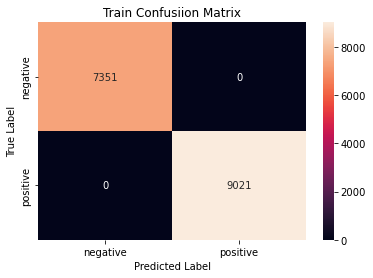

In [77]:
trainconfusionmatrix(Model_Random_Forest,X_train,Y_train)

Confusion Matrix for Test set


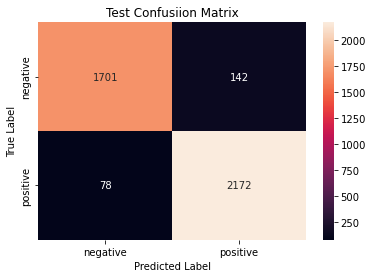

In [78]:
testconfusionmatrix(Model_Random_Forest,x_test,y_test)

In [79]:
print("Train Classification Report: \n")
y_pred_train=Model_Random_Forest.predict(X_train)
print(classification_report(Y_train, y_pred_train))

Train Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7351
           1       1.00      1.00      1.00      9021

    accuracy                           1.00     16372
   macro avg       1.00      1.00      1.00     16372
weighted avg       1.00      1.00      1.00     16372



In [80]:
print("Test Classification Report: \n")
y_pred_test=Model_Random_Forest.predict(x_test)
print(classification_report(y_test, y_pred_test))

Test Classification Report: 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1843
           1       0.94      0.97      0.95      2250

    accuracy                           0.95      4093
   macro avg       0.95      0.94      0.95      4093
weighted avg       0.95      0.95      0.95      4093



**1. Used F1-Score as metric because data is imbalanced and want a balance between precision and recall.**

**2. As We can see that f1 score for training is 1 and test is 0.95 which is near.**

**3. Since the difference in accuracy of train and test are not very high we can say that model is not overfit. Also , it is not performing bad on train and test so we can say that it is not underfit**

### 9.2 XGBOOST Algorithm

#### 9.2.1 Finding the best value Of hyperparameter

In [81]:
from xgboost import XGBClassifier

param_grid= {'max_depth':[1,5,10,50,100,500,1000],
              'n_estimators' :[5,10,20,50,100]
            }


gsv=Grid_SearchCV(XGBClassifier(),X_train,Y_train,param_grid)

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))


Fitting 10 folds for each of 35 candidates, totalling 350 fits
[19:15:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:15:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:15:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:15:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'.

[19:15:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:15:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:15:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:15:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[19:16:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:17:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:17:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:17:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[19:22:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[19:25:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:25:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:25:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:25:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[19:31:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:32:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:32:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:32:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[19:39:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:39:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:40:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:40:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[19:43:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:43:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:43:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:43:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[19:51:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[19:58:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:58:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[20:03:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

#### 9.2.2 Model Training

In [82]:
Best_Param=gsv.best_params_
depth=Best_Param['max_depth']
n_estimator =Best_Param['n_estimators']
Model_XGB=XGBClassifier(max_depth=depth,n_estimators=n_estimator,class_weight="balanced")
Model_XGB.fit(X_train,Y_train)

[20:11:14] WARNING: ../src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:11:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### 9.2.3 Evaluating the performance of model

Confusion Matrix for Train set


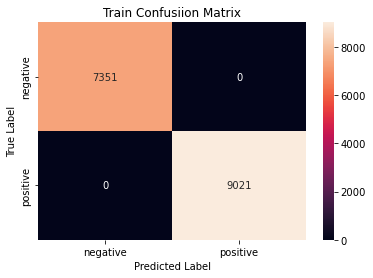

In [83]:
trainconfusionmatrix(Model_XGB,X_train,Y_train)

Confusion Matrix for Test set


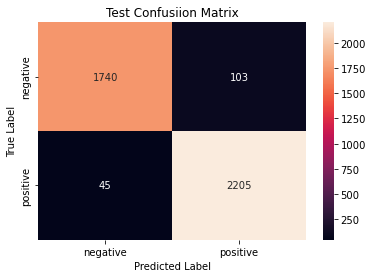

In [84]:
testconfusionmatrix(Model_XGB,x_test,y_test)

In [85]:
print("Train Classification Report: \n")
y_pred_train=Model_XGB.predict(X_train)
print(classification_report(Y_train, y_pred_train))

Train Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7351
           1       1.00      1.00      1.00      9021

    accuracy                           1.00     16372
   macro avg       1.00      1.00      1.00     16372
weighted avg       1.00      1.00      1.00     16372



In [86]:
print("Test Classification Report: \n")
y_pred_test2=Model_XGB.predict(x_test)
print(classification_report(y_test, y_pred_test))

Test Classification Report: 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1843
           1       0.94      0.97      0.95      2250

    accuracy                           0.95      4093
   macro avg       0.95      0.94      0.95      4093
weighted avg       0.95      0.95      0.95      4093



### 9.2.3 Compare to Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Accuracy = logreg.score(x_test, y_test)
print(Accuracy*100)

95.82213535304179


In [88]:
print("Test Classification Report: \n")
y_pred_test1=logreg.predict(x_test)
print(classification_report(y_test, y_pred_test1))

Test Classification Report: 

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1843
           1       0.95      0.98      0.96      2250

    accuracy                           0.96      4093
   macro avg       0.96      0.96      0.96      4093
weighted avg       0.96      0.96      0.96      4093



Confusion Matrix for Test set


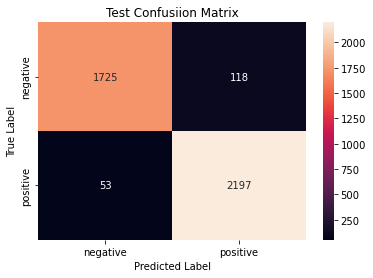

In [89]:
testconfusionmatrix(logreg,x_test,y_test)

**There is some improvement in case of XGBoost for FP and FN, but the logistic regression got better acuuracy and F1 score as shown above**

In [90]:
from joblib import Parallel, delayed
import joblib
  
joblib.dump(Model_Random_Forest, 'Model_Random_Forest.pkl')


['Model_Random_Forest.pkl']

In [91]:
joblib.dump(Model_XGB, 'Model_XGB.pkl')

['Model_XGB.pkl']

In [92]:
joblib.dump(logreg, 'Model_logreg.pkl')

['Model_logreg.pkl']

### Prediction on article data

In [93]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests

url = "https://edition.cnn.com/2022/09/16/politics/donald-trump-hugh-hewitt-interview-indicted/index.html"

# To fetch the url
#html = requests.get(url)

html = urlopen(url)

# Using beautiful soup to pull the html data 
soup = BeautifulSoup(html,"html.parser")

# finding the tag in which the content is present
a = soup.findAll("p",class_="paragraph inline-placeholder")

# Adding all the data in a lists
l=[]

for x in a[2:]:
    l.append(x.text.strip("\n"))
    
data=pd.DataFrame(l,columns=['text'])

**Code source** https://www.geeksforgeeks.org/extract-all-the-urls-from-the-webpage-using-python/

In [94]:
data['text'][0]

'Hewitt: You know the old saying. A prosecutor can indict a ham sandwich if they want to. I’m just asking if there is such a prosecutor and they indict you, would that deter you from running for president again?'

In [95]:
df1 = pd.DataFrame.from_records(data)
df1.head(10)

,text
0,Hewitt: You know the old saying. A prosecutor ...
1,Trump: I don’t think the people of the United ...
2,Hewitt: I do. That’s what I wanted people to u...
3,Trump: It would not. But I think if it happene...
4,"Hewitt: What kind of problems, Mr. President."
5,"Trump: I think they’d have big problems, big p..."
6,It’s impossible to read those lines from...
7,"Hewitt, sensing that Trump had wandered ..."
8,"To which Trump responded: “That’s not, t..."
9,(Sidebar: The dictionary definition of “...


In [96]:
# model = trained word2vec model
# data= retrieve data from the article
# size = the size given at the time of word2vec embedding i.e in this case 300

def prediction_data_process(model,data,size):
    
    prediction_data=np.asarray(list(data['text']))
    prediction_data=process(prediction_data)
    cleaned_prediction_data=[]
    for sent in prediction_data:
        cleaned_prediction_data.append(sent.split()) 
        
    vectors = []
    for sent in cleaned_prediction_data:
        sent_vec = np.zeros(size)
        cnt_words = 0
        for word in sent:
            try:
                vec = word2vec_model.wv[word]  # getting the vector corresponding to the word
                sent_vec += vec       # Adding the vectors of all the words present in sentence
                cnt_words += 1        # counting the number of words
            except:
                pass
        if cnt_words!=0:    
            sent_vec /= cnt_words
        vectors.append(sent_vec)
    
    return np.nan_to_num(vectors)

In [97]:
final_prediction_data=prediction_data_process(word2vec_model,data,300)

100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 2965.57it/s]


In [98]:
final_prediction_data[3][1:10]

array([ 0.09880161,  0.04556514,  0.10987546, -0.08896109, -0.30538714,
        0.1306983 ,  0.57335843,  0.02530058, -0.08734161])

In [99]:
len(final_prediction_data)

15

In [151]:
# Saving the processed data

pd.DataFrame(final_prediction_data).to_csv("article_data.csv")

In [100]:
from joblib import Parallel, delayed
import joblib
  
  
# Load the model from the file

RF_Model = joblib.load('Model_Random_Forest.pkl')
  

In [101]:
RF_Model.predict(final_prediction_data)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [102]:
RF_Model.predict_proba(final_prediction_data)

array([[0.71, 0.29],
       [0.55, 0.45],
       [0.62, 0.38],
       [0.49, 0.51],
       [0.65, 0.35],
       [0.62, 0.38],
       [0.78, 0.22],
       [0.84, 0.16],
       [0.43, 0.57],
       [0.89, 0.11],
       [0.77, 0.23],
       [0.54, 0.46],
       [0.69, 0.31],
       [0.83, 0.17],
       [0.65, 0.35]])

In [124]:
RF_p = [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

df1['RF_p'] = RF_p

In [125]:
df1

,text,RF_p
0,Hewitt: You know the old saying. A prosecutor ...,0
1,Trump: I don’t think the people of the United ...,0
2,Hewitt: I do. That’s what I wanted people to u...,0
3,Trump: It would not. But I think if it happene...,1
4,"Hewitt: What kind of problems, Mr. President.",0
5,"Trump: I think they’d have big problems, big p...",0
6,It’s impossible to read those lines from...,0
7,"Hewitt, sensing that Trump had wandered ...",0
8,"To which Trump responded: “That’s not, t...",1
9,(Sidebar: The dictionary definition of “...,0


In [126]:
df1['RF_p'].value_counts()

0    13
1     2
Name: RF_p, dtype: int64

In [106]:
RF_Model.predict(final_prediction_data)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [107]:
logreg

LogisticRegression()

In [108]:
!pip install --upgrade --user praw

In [127]:
import seaborn as sns
from IPython import display
from pprint import pprint
import praw
reddit = praw.Reddit(client_id='b0e4***************',
client_secret='TWv**************',
user_agent='Abd********') 

In [110]:
news = set() 
for sub in reddit.subreddit('politics').new(limit=400):
    news.add(sub.title)
print(len(news))

398


In [111]:
news

{'"Very liberal" candidate releases own sex tape to break from the pack',
 '\'I\'m Going To Punch Him Out\': New Jan. 6 Video Shows Pelosi\'s Reaction To Trump Speech — "I’m going to go to jail, and I’m going to be happy," House Speaker Nancy Pelosi says in the clip.',
 "'See you in an hour': Stunning audio between Pence and Pelosi released",
 '240+ Groups Push Senate to Defy Telecom Attacks and Confirm Biden FCC Pick',
 '70 Percent of Republicans Running for Congress Doubt 2020 Election Result',
 'A Court Just Ruled Collective Punishment Is Legal in America',
 'A Wealth Tax on the 0.25 Percent Could Fund Biden’s Entire Student Debt Plan',
 'A dizzying week for Trump’s legal issues',
 'AOC hits back at Lauren Boebert for calling her too scared to hold town halls: ‘You seem to have us confused’',
 'AOC leads mockery of Fox contributor after he blames inflation for $28 Taco Bell lunch',
 'AT&T to pay $23M fine for bribing powerful lawmaker’s ally in exchange for vote',
 'Absentee ballot 

In [112]:
# Create sub-reddit instance
subreddit_name = "politics"
subreddit = reddit.subreddit(subreddit_name)

df = pd.DataFrame() # creating dataframe for displaying scraped data

# creating lists for storing scraped data
titles=[]
posts=[]
ids=[]

# looping over posts and scraping it
for submission in subreddit.top(limit=300):
    titles.append(submission.title)
    posts.append(submission.score) #upvotes
    ids.append(submission.id)
    
    
df['Title'] = titles
df['Id'] = ids
df['posts'] = posts #upvotes

print(df.shape)
df.head(10)

(300, 3)


,Title,Id,posts
0,Megathread: Joe Biden Projected to Defeat Pres...,jptq5n,214315
1,Mitch McConnell Will Lose Control Of The Senat...,krntg6,156755
2,AOC challenges Trump to release his college tr...,i9161a,153248
3,Megathread: House Votes to Impeach President D...,ecm1zg,147733
4,"Biden signs federal mask mandate, repeals Musl...",l1k8xa,136817
5,Trump Threatens to ‘Leave the Country’ if He L...,jcm5dz,135306
6,Demands for Kushner to Resign Over 'Staggering...,i19sjg,129739
7,Over A million people sign petition calling fo...,h7ic8s,129214
8,Report: Biden Admin Discovers Trump Had Zero P...,l1ynt4,127950
9,Biden's Pennsylvania lead is now big enough to...,jsi48r,125943


### 10.1 Data Cleaning & EDA

In [113]:
# Removing the un-important columns
df=df[['Title']]

In [114]:
df['Title'][0]

'Megathread: Joe Biden Projected to Defeat President Donald Trump and Win the 2020 US Presidential Election'

In [115]:
df.isnull().sum()

Title    0
dtype: int64

In [116]:
empty_index = [index for index,Title in enumerate(df.Title.values) if str(Title).strip() == '']
print(f"No of empty rows: {len(empty_index)}")
df.iloc[empty_index].tail()

No of empty rows: 0


,Title


In [117]:
nltk.download('wordnet')
#establish the lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
df['Title'] = df.Title.apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))
df.head(10)

[nltk_data] Downloading package wordnet to /Users/newuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Title
0,Megathread: Joe Biden Projected to Defeat Pres...
1,Mitch McConnell Will Lose Control Of The Senat...
2,AOC challenge Trump to release his college tra...
3,Megathread: House Votes to Impeach President D...
4,"Biden sign federal mask mandate, repeal Muslim..."
5,Trump Threatens to ‘Leave the Country’ if He L...
6,Demands for Kushner to Resign Over 'Staggering...
7,Over A million people sign petition calling fo...
8,Report: Biden Admin Discovers Trump Had Zero P...
9,Biden's Pennsylvania lead is now big enough to...


In [118]:
# in order to remove bias I will shuffle the data
from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop=True)
df
# Convert the text to lowercase:
df['Title'] = df['Title'].apply(lambda x: x.lower())
# Remove punctuation:
import string
def punctuation_removal(Title):
    all_list = [char for char in Title if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
df['Title'] = df['Title'].apply(punctuation_removal)

In [119]:
stop = stopwords.words('english')
df['Title'] = df.Title.apply(lambda x: " ".join(w for w in x.split() if w not in stop))
df.head(10)

,Title
0,auschwitz memorial call greene holocaust comme...
1,biden bars trump intelligence briefings
2,trump refuse denounce white supremacy say stan...
3,donald trump tell supporter ha never lost elec...
4,biden plan immediate flurry executive order re...
5,pence invoke 25th amendment remove trump offic...
6,jon ossoff beat sen david perdue handing democ...
7,trump gop sued breaching kkk act ‘coordinated ...
8,opinion you’re ‘essential’ enough work pandemi...
9,calculated much pay trump play golf turns hes ...


(-0.5, 399.5, 199.5, -0.5)

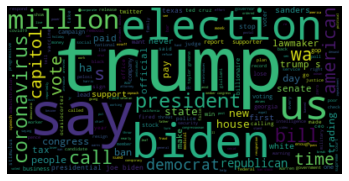

In [120]:
wc = WordCloud().generate('Title'.join(df['Title']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')

In [128]:
# genrate the token list:
token1 = ' '.join(df.Title).split()

In [129]:
# creating the bigrams
ngrams_2 = nltk.bigrams(token1)

# freq distribution for these
freq_2grams = pd.Series(ngrams_2).value_counts().to_dict()
list(freq_2grams.items())[:20]

[(('joe', 'biden'), 11),
 (('donald', 'trump'), 9),
 (('bernie', 'sanders'), 9),
 (('alexandria', 'ocasiocortez'), 5),
 (('ted', 'cruz'), 5),
 (('supreme', 'court'), 5),
 (('trump', 'campaign'), 4),
 (('member', 'congress'), 4),
 (('capitol', 'riot'), 4),
 (('ban', 'stock'), 4),
 (('marjorie', 'taylor'), 4),
 (('trump', 'administration'), 4),
 (('president', 'trump'), 4),
 (('taylor', 'greene'), 4),
 (('president', 'donald'), 4),
 (('elizabeth', 'warren'), 4),
 (('mitch', 'mcconnell'), 3),
 (('kamala', 'harris'), 3),
 (('megathread', 'president'), 3),
 (('bill', 'would'), 3)]

In [130]:
 # creating the trigrams
ngrams_3 = nltk.trigrams(token1)

# freq distribution for these
freq_3grams = pd.Series(ngrams_3).value_counts().to_dict()
list(freq_3grams.items())[:20]

[(('marjorie', 'taylor', 'greene'), 4),
 (('make', 'election', 'day'), 3),
 (('us', 'election', 'biden'), 3),
 (('lawsuit', 'produced', 'exactly'), 2),
 (('reintroduces', 'bill', 'bar'), 2),
 (('ban', 'stock', 'trading'), 2),
 (('produced', 'exactly', 'zero'), 2),
 (('refuse', 'wear', 'mask'), 2),
 (('megathread', 'house', 'votes'), 2),
 (('release', 'college', 'transcript'), 2),
 (('judge', 'throws', 'trump'), 2),
 (('sen', 'elizabeth', 'warren'), 2),
 (('zero', 'evidence', 'fraud'), 2),
 (('georgia', 'judge', 'throws'), 2),
 (('campaign', 'lawsuit', 'produced'), 2),
 (('trump', 'campaign', 'lawsuit'), 2),
 (('throws', 'trump', 'campaign'), 2),
 (('donald', 'j', 'trump'), 2),
 (('impeach', 'president', 'donald'), 2),
 (('president', 'donald', 'j'), 2)]

### 10.2 Text Preprocessing 

In [121]:
# model = trained word2vec model
# data= retrieved data from Reddit
# size = the size given at the time of word2vec embedding i.e in this case 300

def prediction_data_process(model,df,size):
    
    prediction_data=np.asarray(list(df['Title']))
    prediction_data=process(prediction_data)
    cleaned_prediction_data=[]
    for sent in prediction_data:
        cleaned_prediction_data.append(sent.split()) 
        
    vectors = []
    for sent in cleaned_prediction_data:
        sent_vec = np.zeros(size)
        cnt_words = 0
        for word in sent:
            try:
                vec = word2vec_model.wv[word]  # getting the vector corresponding to the word
                sent_vec += vec       # Adding the vectors of all the words present in sentence
                cnt_words += 1        # counting the number of words
            except:
                pass
        if cnt_words!=0:    
            sent_vec /= cnt_words
        vectors.append(sent_vec)
    
    return np.nan_to_num(vectors)

In [122]:
final_prediction_data1=prediction_data_process(word2vec_model,df,300)

100%|██████████████████████████████████████| 300/300 [00:00<00:00, 17027.87it/s]


In [149]:
# Saving the processed data

pd.DataFrame(final_prediction_data1).to_csv("Reddit_data.csv")

In [132]:
final_prediction_data1[3][1:10]

array([ 0.15803199, -0.06958405,  0.01574671, -0.05597688, -0.35265177,
        0.22101462,  0.49465147, -0.01329884,  0.00551676])

In [133]:
from joblib import Parallel, delayed
import joblib
  
  
# Load the model from the file

RF_Model = joblib.load('Model_Random_Forest.pkl')


## 1 = Real 
## 0 = Fake 

'



### RF Model 

In [134]:
RF_Model.predict(final_prediction_data1)

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [135]:
# creating a list for new column
RF_pred = [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
df['RF_pred'] = RF_pred

In [136]:
df

,Title,RF_pred
0,auschwitz memorial call greene holocaust comme...,0
1,biden bars trump intelligence briefings,0
2,trump refuse denounce white supremacy say stan...,0
3,donald trump tell supporter ha never lost elec...,1
4,biden plan immediate flurry executive order re...,1
...,...,...
295,donald trump labelled loser year europes bigge...,0
296,shark tanks kevin oleary covid19 stimulus give...,0
297,fox news sued 16bn false election claim,0
298,amy mcgrath takes narrow lead mitch mcconnell ...,1


### XGBoost:

In [137]:
Model_XGB = joblib.load('Model_XGB.pkl')

In [138]:
Model_XGB.predict(final_prediction_data1)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [139]:
XGB_pred = [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
df['XGB_pred'] = XGB_pred

In [140]:
df

,Title,RF_pred,XGB_pred
0,auschwitz memorial call greene holocaust comme...,0,0
1,biden bars trump intelligence briefings,0,0
2,trump refuse denounce white supremacy say stan...,0,0
3,donald trump tell supporter ha never lost elec...,1,0
4,biden plan immediate flurry executive order re...,1,1
...,...,...,...
295,donald trump labelled loser year europes bigge...,0,0
296,shark tanks kevin oleary covid19 stimulus give...,0,0
297,fox news sued 16bn false election claim,0,0
298,amy mcgrath takes narrow lead mitch mcconnell ...,1,1


### LR 

In [141]:
logreg = joblib.load('Model_logreg.pkl')

In [142]:
logreg.predict(final_prediction_data1)

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [143]:
LR_pred = [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
df['LR_pred'] = LR_pred

In [144]:
df

,Title,RF_pred,XGB_pred,LR_pred
0,auschwitz memorial call greene holocaust comme...,0,0,0
1,biden bars trump intelligence briefings,0,0,0
2,trump refuse denounce white supremacy say stan...,0,0,0
3,donald trump tell supporter ha never lost elec...,1,0,1
4,biden plan immediate flurry executive order re...,1,1,1
...,...,...,...,...
295,donald trump labelled loser year europes bigge...,0,0,0
296,shark tanks kevin oleary covid19 stimulus give...,0,0,0
297,fox news sued 16bn false election claim,0,0,0
298,amy mcgrath takes narrow lead mitch mcconnell ...,1,1,1


0    184
1    116
Name: RF_pred, dtype: int64


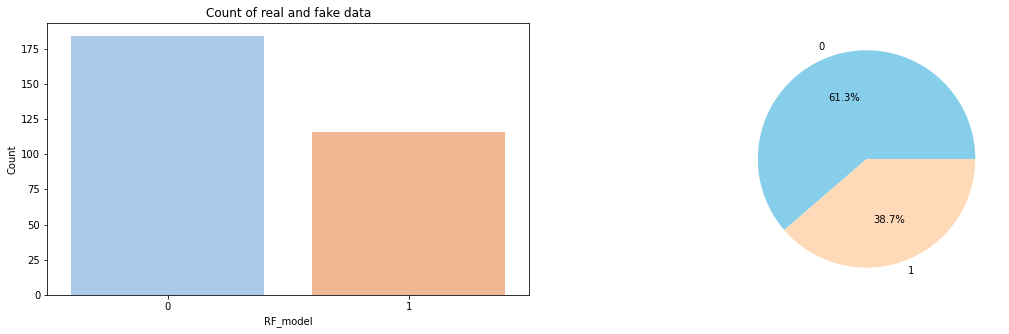

In [145]:
print(df["RF_pred"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(df.RF_pred,ax=ax[0],palette="pastel");
g1.set_title("Count of real and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("RF_model")
g2 = plt.pie(df["RF_pred"].value_counts().values,explode=[0,0],labels=df.RF_pred.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
fig.show()

0    212
1     88
Name: XGB_pred, dtype: int64


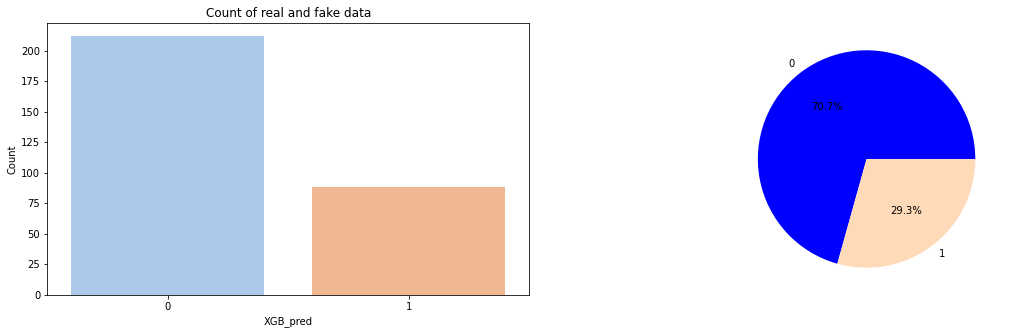

In [146]:
print(df["XGB_pred"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(df.XGB_pred,ax=ax[0],palette="pastel");
g1.set_title("Count of real and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("XGB_pred")
g2 = plt.pie(df["XGB_pred"].value_counts().values,explode=[0,0],labels=df.XGB_pred.value_counts().index, autopct='%1.1f%%',colors=['Blue','PeachPuff'])
fig.show()

0    201
1     99
Name: LR_pred, dtype: int64


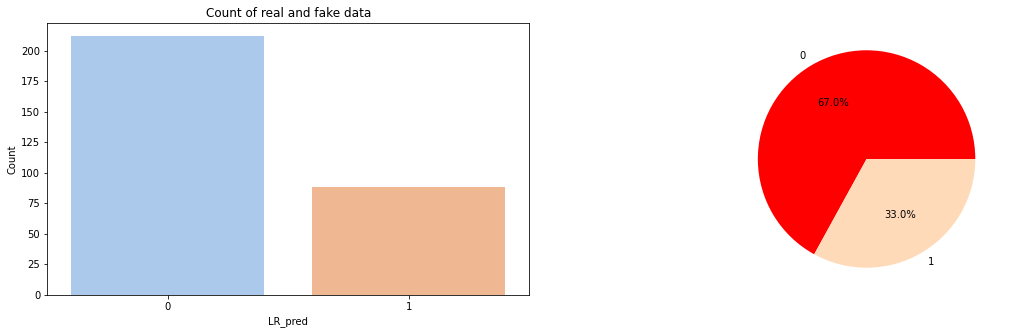

In [147]:
print(df["LR_pred"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(df.XGB_pred,ax=ax[0],palette="pastel");
g1.set_title("Count of real and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("LR_pred")
g2 = plt.pie(df["LR_pred"].value_counts().values,explode=[0,0],labels=df.LR_pred.value_counts().index, autopct='%1.1f%%',colors=['Red','PeachPuff'])
fig.show()

# Conclusion: 

In this project, the best model was the Logistic Regression model. There are loads of scopes for further improvement on this use case, especially in designing deep learning models.
It is very noticeable that the percentage of fake news is more than the real one. 
Future work, adding more and accurate data will greatly improve the project. Also, in the interest of time, we did not apply models like AdaBoost classifier which could result in improved performance than the Logistic Regression. Finaly, we can trust the logistic regression model because it did better job.  



**Important: There is a very small change to the results especially the demonstration of thre three classifcations because I re-ran the whole codes and there was a change to the data from Reddit. But, there was not an influential difference** 